In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import GridSimulator
HeatSimulation = GridSimulator.ClassHeatSimulation()

In [2]:
NumberNodes = 4
HeatSimulation.SetSize(.005,.025)
HeatSimulation.SetNodes(NumberNodes,.10)
HeatSimulation.SetMaterialProperties(7753,486,36)
HeatSimulation.SetConvectionProperties(4,25)
HeatSimulation.EnableSurfaceHeatTransfer(True)
HeatSimulation.SetHeatSource(200)
HeatSimulation.SetInitalTemp(25)

In [14]:
HeatSimulation.SetTimeIncrement(1)
HeatSimulation.SuggestedTimeInc(True)

20.0

In [15]:
def Logic(TempArray,Type):
    if Type == "BangBang":
        if (TempArray[NumberNodes + 1] > 135 + 5):
            HeatSimulation.TempLeftEnd = 25;
        elif (TempArray[NumberNodes + 1] <= 135 - 5):
            HeatSimulation.TempLeftEnd = 200;

In [16]:
Duration = 3600
StepNumber = 0
TargetTemp = 45
HeatSimulation.TempLeftEnd = 200
HeatSimulation.SetHeatSource(200)
TEMPS = HeatSimulation.Temps
while StepNumber < Duration:
    Inc = 10
    StepNumber = StepNumber + Inc
    HeatSimulation.SetInitalTempProfile(TEMPS)
    HeatSimulation.GetTempatureAtNodeAtTime(StepNumber-Inc,StepNumber,4)
    TEMPS = HeatSimulation.Temps
    Logic(TEMPS,"BangBang")

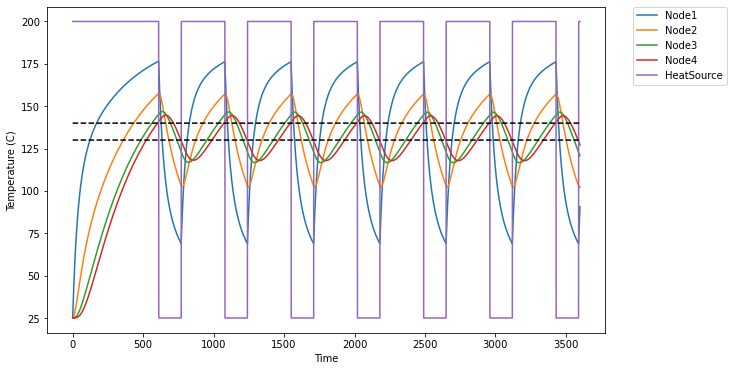

In [26]:
dfValidate4 = HeatSimulation.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, label="Node4")
plt.plot(dfValidate4.Time, dfValidate4.Heater, label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.rcParams["figure.figsize"] = (10,6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

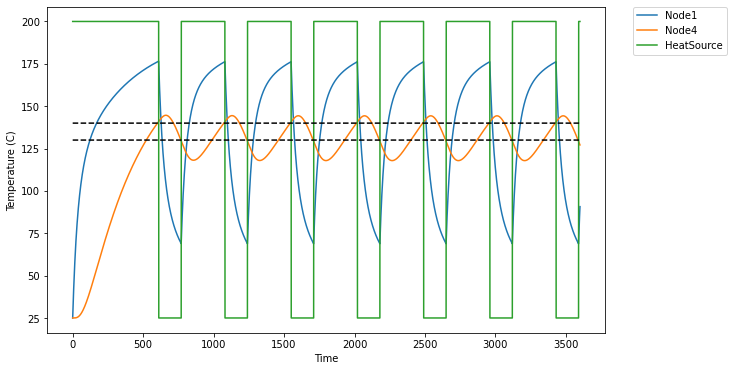

In [27]:
dfValidate4 = HeatSimulation.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
#plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
#plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, label="Node4")
plt.plot(dfValidate4.Time, dfValidate4.Heater, label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.plot(dfValidate4.Time, 130*np.ones(dfValidate4.Time.shape), "--k")
plt.plot(dfValidate4.Time, 140*np.ones(dfValidate4.Time.shape), "--k")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.rcParams["figure.figsize"] = (10,6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [28]:
HeatSimulation.AllTemp

,Time,Heater,Node1,Node2,Node3,Node4,Convection
0,0.0,200.0,25.000000,25.000000,25.000000,25.000000,25.0
1,1.0,200.0,27.675189,25.000000,25.000000,25.000000,25.0
2,2.0,200.0,30.268134,25.040895,25.000000,25.000000,25.0
3,3.0,200.0,32.781987,25.120171,25.000625,25.000000,25.0
4,4.0,200.0,35.219768,25.235447,25.002443,25.000019,25.0
...,...,...,...,...,...,...,...
3596,3596.0,200.0,82.773053,102.110172,121.558719,127.973520,25.0
3597,3597.0,200.0,84.850867,102.098778,121.343074,127.759906,25.0
3598,3598.0,200.0,86.864627,102.116201,121.130619,127.546266,25.0
3599,3599.0,200.0,88.816744,102.160624,120.921696,127.332699,25.0


In [38]:
TempProfile = HeatSimulation.AllTemp.iloc[:,0:2]
TempProfileExport = pd.DataFrame(TempProfile)
TempProfileExport.to_csv("TempatureProfile.csv", index=False)
TempProfileExport

,Time,Heater
0,0.0,200.0
1,1.0,200.0
2,2.0,200.0
3,3.0,200.0
4,4.0,200.0
...,...,...
3596,3596.0,200.0
3597,3597.0,200.0
3598,3598.0,200.0
3599,3599.0,200.0
